# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
0.001
-0.001
-0.003
-0.001
0.0
0.0
-0.001
-0.001
0.0
0.001
-0.007
-0.007
0.0
-0.003
-0.004
0.997
0.999
1.0
0.998
1.001
1.987
1.992
1.993
1.995
1.995
2.988
2.993
2.993
2.992
2.991
3.986
3.988
3.987
3.987
3.989
4.986
4.985
4.983
4.984
5.98
5.978
5.982
5.982
6.942
6.942
6.946
7.901
7.9
7.898
7.898
8.897
8.897
8.894
9.899
9.899
9.898
9.898
10.893
10.894
10.896
10.896
10.896
11.89
11.894
11.895
11.896
11.898
12.891
12.894
12.895
12.891
12.899
13.888
13.888
13.895
13.895
13.896
14.713
14.712
14.712
14.714
15.53
15.527
15.526
15.529
16.526
16.526
16.526
16.526
17.519
17.526
17.526
17.523
17.523
18.525
18.525
18.522
18.524
19.52
19.52
19.52
19.52
20.518
20.518
20.517
20.517
21.518
21.517
21.515
22.075
22.077
22.072
22.076
22.64
22.639
22.636
22.637
23.628
23.628
23.628
23.629
23.631
24.621
24.621
24.621
24.621
24.621
24.621
24.621
25.618
26.617
26.616
26.614
26.614
27.61
27.612
27.61
27.61
28.611
28.611
28.61
29.124
29.125
29.677
29.678
29.676
29.67

57.067
57.066
57.066
57.07
57.067
57.067
57.067
57.067
57.067
57.067
57.067
57.066
57.066
57.066
57.064
57.061
57.211
57.211
57.214
57.213
57.213
57.21
57.211
57.211
57.211
57.208
57.234
57.234
57.234
57.236
57.233
57.233
57.233
57.231
57.231
57.23
57.23
57.23
57.229
57.23
57.229
57.229
57.228
57.227
57.23
57.227
57.231
57.227
57.228
57.227
57.228
57.229
57.228
57.226
57.227
57.226
57.227
57.225
57.227
57.228
57.224
57.224
57.224
57.221
57.224
57.227
57.226
57.403
57.403
57.407
57.403
57.403
57.403
57.396
57.425
57.425
57.426
57.427
57.438
57.438
57.438
57.438
57.44
57.439
57.439
57.439
57.436
57.435
57.435
57.435
57.435
57.435
57.435
57.437
57.434
57.435
57.434
57.43
57.432
57.433
57.433
57.433
57.432
57.432
57.433
57.432
57.431
57.431
57.434
57.431
57.43
57.434
57.431
57.43
57.43
57.43
57.43
57.428
57.43
57.635
57.637
57.637
57.635
57.635
57.635
57.634
57.633
57.66
57.66
57.659
57.657
57.657
57.656
57.656
57.66
57.654
57.657
57.657
57.657
57.656
57.657
57.657
57.655
57.655
57.654
57.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1407,2814,59.691
1408,2816,59.688
1409,2818,59.687
1410,2820,59.688


<IPython.core.display.Javascript object>


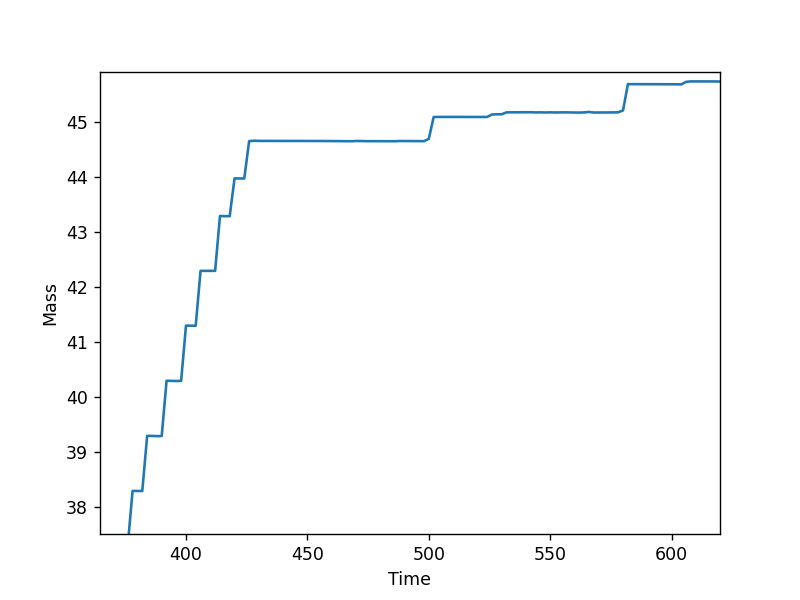

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_240723_S673-678.csv')